# Data analysis using a pipeline

This notebook gives an example of analysing data using the pre-implemented `BasicPlus` analysis pipeline of the `qpcr.Pipes` sub-module.
It makes use of the provided example data in the `Example Data` directory. 


#### Experimental background

The corresponding experimental setup was as follows: 
Levels of Nonsense-mediated mRNA decay (NMD) sensitive (nmd) and insensitive (prot) transcript isoforms of HNRNPL and SRSF11 were measured by qPCR. As normalisers both 28S rRNA and Actin transcript levels were measured. The replicates are biological triplicates and technical douplicates. All measurements from the same qPCR sample were merged into hexaplicates (6 replicates). This was done in two separate HeLa cell lines (one with a specific gene knockout (KO), and one without (WT)), which were both treated to a plasmid-mediated rescue (+) or not (-), leading to four experimental conditions:

| cell line \\ condition | rescue | no rescue |
| ---------------------- | ------ | --------- |
| knockout               | KO+    | KO-       |
| wildtype               | WT+    | WT-       |



#### Simple Analysis
In this example we will perform the same basic Delta-Delta Ct analysis, we did in the manual tutorial from `1_manual_tutorial.ipynb`. However, this time weill be using the pre-implemented `BasicPlus` pipeline of the `qpcr.Pipes` sub-module to make our life easier.

In [1]:
# import what we need
from qpcr.Pipes import BasicPlus
from qpcr.Plotters import PreviewResults

## Step 1 - Setting up the Pipeline
---

### 1.1 Setting up the `BasicPlus` pipeline
Conveniently, we do not have to define our own `qpcr.SampleReader` and `qpcr.Analyser` etc. anymore as the pipeline will handle this already. When using the pipelines our only concern is linking the data and specifying the experimental setup. 
Additionally, we can link `qpcr.Plotters` objects such as the `PreviewResults` figure class to inspect our results later on.  

In [2]:
# setup the pipeline
pipeline = BasicPlus()

# (yes, that's it already...)

If we wanted to save the results to a specific location (which we normally would like to do) we can set a specific location to save to using the `save_to` method.

In [3]:
pipeline.save_to("./Example Results")

### 1.2 Setting up the data
The pipeline is designed to work either with a list of `filepaths` or with `directory` paths that contain the datafiles (if normalisers and sample assays are stored separately). Since we already generated filepath lists in the previous tutorial we will simply re-use these here.

In [4]:
# get our datafiles
normaliser_files = [
                        "./Example Data/28S.csv",
                        "./Example Data/actin.csv"
                ]

sample_files = [
                    "./Example Data/HNRNPL_nmd.csv",
                    "./Example Data/HNRNPL_prot.csv",
                    "./Example Data/SRSF11_nmd.csv",
                    "./Example Data/SRSF11_prot.csv",
            ]

# define our experimental parameters
reps = 6
group_names = ["WT-", "WT+", "KO-", "KO+"] 

### 1.3 Setting up the Preview for later
Since we want to generate a preview of our results, we must set up a `qpcr.Plotters.PreviewResults` object that we can link to the pipeline. This step we will still have to do manually, because we must specify if we want an interactive or static preview.

In [5]:
# setup our preview
preview = PreviewResults(mode = "static")

# and link our preview to the pipeline
pipeline.add_plotters(preview)

> Note
>
> Of course, you can still manually plot the results from the pipeline after it was run using the `get` method from the pipeline to get the `qpcr.Results` object and then `linking` that to the `PreviewPlotter` as in: 
<br>
>
> ```python
>   # get qpcr.Results object (by default pipelines already 
>   # return dataframes using their get methods)
>   results = pipeline.get( kind = "obj" )
>
>   # link results and plot
>   preview.link(results)
>   preview.plot()
> ```

## Step 2 - Feed our data to the pipeline
---
Next we feed our pipeline with our experimental data.

In [6]:
# first we add the experimental setup 
pipeline.replicates(reps)
pipeline.names(group_names)

# now we add the datafiles
pipeline.add_assays(sample_files)
pipeline.add_normalisers(normaliser_files)

## Step 3 - Running everything

### 3.1 Hitting the `run()` button 🕹
Now that we are all set up, we are ready to go. The only thing to do now is to run the pipeline by calling the `run()` method.

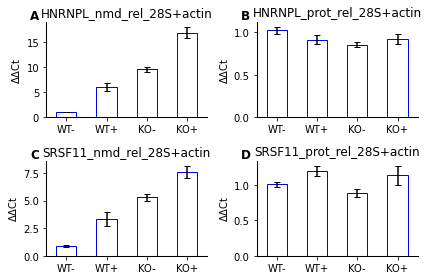

In [7]:
# run the pipeline
pipeline.run()

## Step 4 - Inspecting the results
---
### 4.1 Getting our results
In order to get our results we can, again, use the `get()` method. For pipelines the `get()` method can return either `pandas DataFrames` with the individual replicate values or summary statistics, or the underlying `qpcr.Results` object. Check out the documentation for more details.

In [8]:
# get our results as summary statistics (that's the default return format)
summary_stats = pipeline.get()

# and inspect
summary_stats

,group,assay,mean,stdev,median,group_name
0,0,HNRNPL_nmd_rel_28S+actin,1.050056,0.029452,1.050267,WT-
4,1,HNRNPL_nmd_rel_28S+actin,6.052860,0.890336,6.366251,WT+
8,2,HNRNPL_nmd_rel_28S+actin,9.566500,0.513593,9.614924,KO-
12,3,HNRNPL_nmd_rel_28S+actin,16.940332,1.126687,16.964906,KO+
1,0,HNRNPL_prot_rel_28S+actin,1.025239,0.040091,1.006244,WT-
5,1,HNRNPL_prot_rel_28S+actin,0.913758,0.050860,0.917271,WT+
9,2,HNRNPL_prot_rel_28S+actin,0.856658,0.029906,0.862768,KO-
13,3,HNRNPL_prot_rel_28S+actin,0.925665,0.057855,0.931949,KO+
2,0,SRSF11_nmd_rel_28S+actin,0.885403,0.102865,0.857620,WT-
6,1,SRSF11_nmd_rel_28S+actin,3.374373,0.638138,3.644576,WT+


At this point we have reached the end of this tutorial. You are now able to use the `BasicPlus` pipeline to analyse your data. The `Basic` pipeline works just the same, except that it does not support the linking of a Plotters.

In [ ]:
"""
Here is just again our entire workflow with all the code we just wrote:
"""
# get our datafiles
normaliser_files = [
                        "./Example Data/28S.csv",
                        "./Example Data/actin.csv"
                ]

sample_files = [
                    "./Example Data/HNRNPL_nmd.csv",
                    "./Example Data/HNRNPL_prot.csv",
                    "./Example Data/SRSF11_nmd.csv",
                    "./Example Data/SRSF11_prot.csv",
            ]

# define our experimental parameters
reps = 6
group_names = ["WT-", "WT+", "KO-", "KO+"] 

# setting up the pipeline
pipeline = BasicPlus()
pipeline.save_to("./Example Results")

pipeline.replicates(reps)
pipeline.names(group_names)

# setup our preview
preview = PreviewResults(mode = "static")
pipeline.add_plotters(preview)

# feed in our data
pipeline.add_assays(sample_files)
pipeline.add_normalisers(normaliser_files)

# run the pipeline
pipeline.run()

# and at this point the results are already saved :-)